In [ ]:
'''
Moore - Penrose Pseudo Inverse can be used in cases where we cannot find the Inverse of a Matrix.

A+ = V . D+ . U_T
'''

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [1]:
# Let us for simplicity consider X = Dosage of Drug in ml and Y = Improvement score after taking the Drug.

In [15]:
X1 = [ 0., 1., 2., 3., 4., 5., 6., 7., 8.]
Y = [ 0.86, 1.31, 1.62, 1.78, 2.01, 2.34, 2.56, 3.03, 4.0 ]

In [3]:
title = 'Clinical Trial'
xlabel = 'Drug dosage in ml'
ylabel = 'Improvement Score'

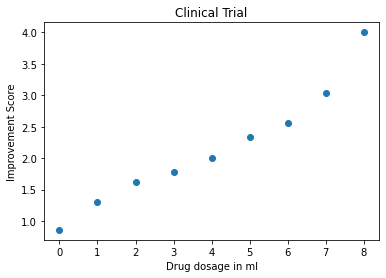

In [16]:
fig, ax = plt.subplots()
plt.title( title )
plt.xlabel( xlabel )
plt.ylabel ( ylabel )
_ = ax.scatter( X1, Y )

In [17]:
X_0 = np.ones( 9 )

#Y = [1 x1 x2 ... xm ] . [a b c  .... m]

X = np.concatenate( ( np.matrix(X_0).T, np.matrix(X1).T ), axis = 1 )

print("Feature Matrix, X = \r\n", X)

Feature Matrix, X = 
 [[1. 0.]
 [1. 1.]
 [1. 2.]
 [1. 3.]
 [1. 4.]
 [1. 5.]
 [1. 6.]
 [1. 7.]
 [1. 8.]]


In [18]:
#In Regression, WKT: Y = X.w
#Our Target is to find the tunable parameters "W", therefore: w = X_inv . Y

w = np.dot( np.linalg.pinv( X ), Y )

In [19]:
print("Weights = \r\n", w)

Weights = 
 [[0.82377778 0.336     ]]


In [13]:
# y - intercept "b" = 1st weight

b = np.asarray(w).reshape( -1 )[0]

# m = slope of regression line = 2nd weight

m = np.asarray(w).reshape( -1 )[1]

print( "The y - intercept is : ", b )
print( "The lsope of Regression Line is : ", m )

The y - intercept is :  0.8237777777777777
The lsope of Regression Line is :  0.3359999999999998


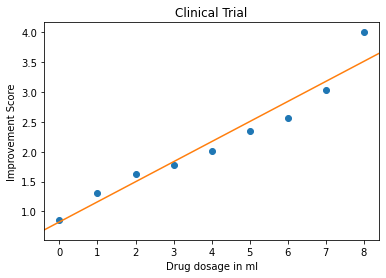

In [20]:
fig, ax = plt.subplots()

plt.title( title )
plt.xlabel( xlabel )
plt.ylabel( ylabel )

ax.scatter( X1, Y )

xmin, xmax = ax.get_xlim()

y_at_x_min = m * xmin + b
y_at_x_max = m * xmax + b

ax.set_xlim( [ xmin, xmax ] )
_ = ax.plot( [ xmin, xmax ], [ y_at_x_min, y_at_x_max ], c = 'C01' )